In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # for scalling the data indo particular range
from sklearn.model_selection import train_test_split #for training and testing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score,precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report

import tensorflow as tf
import pickle

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')


<ipython-input-1-9a04ef555d85>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML_projects_data/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.shape

(768, 9)

In [ ]:
data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

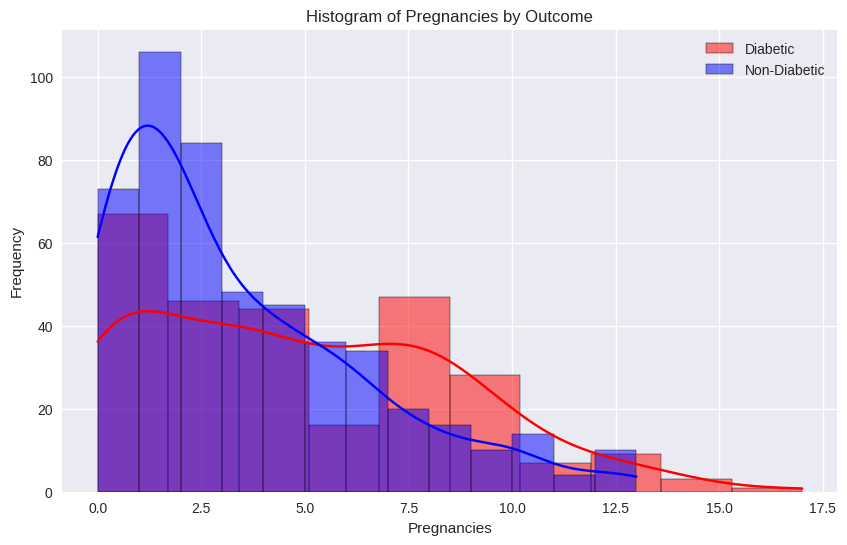

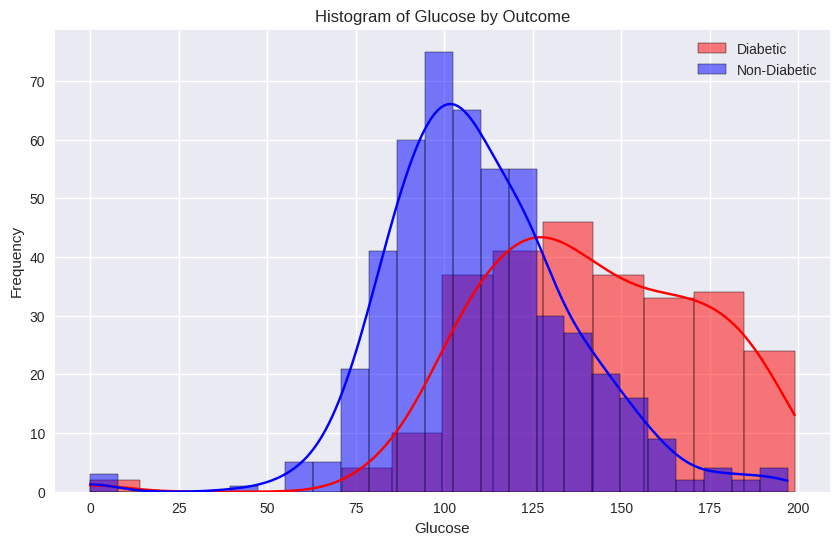

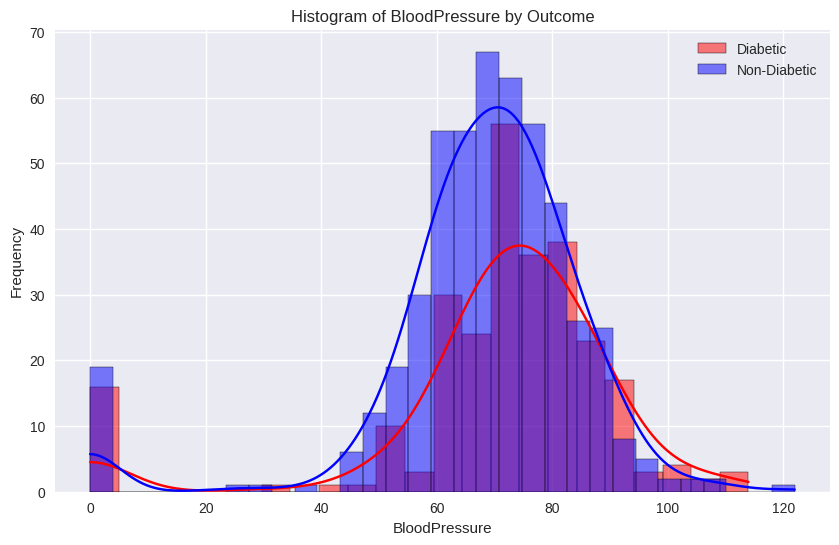

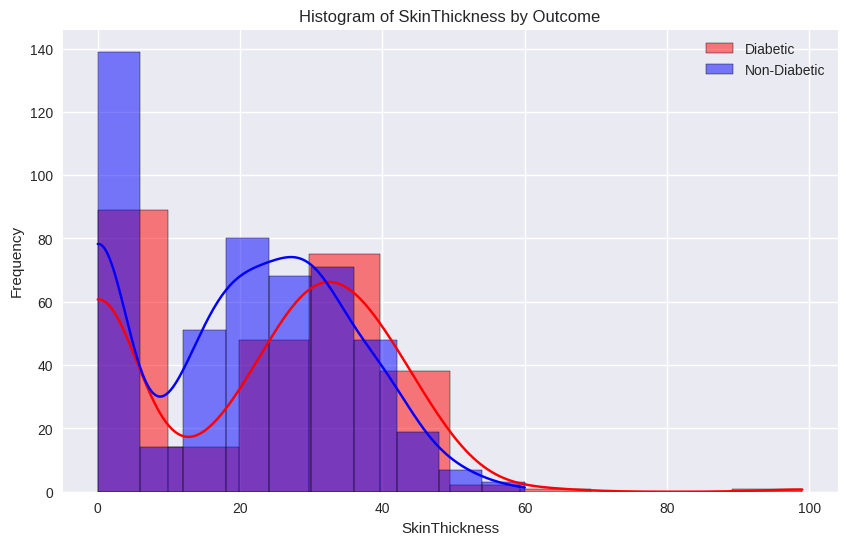

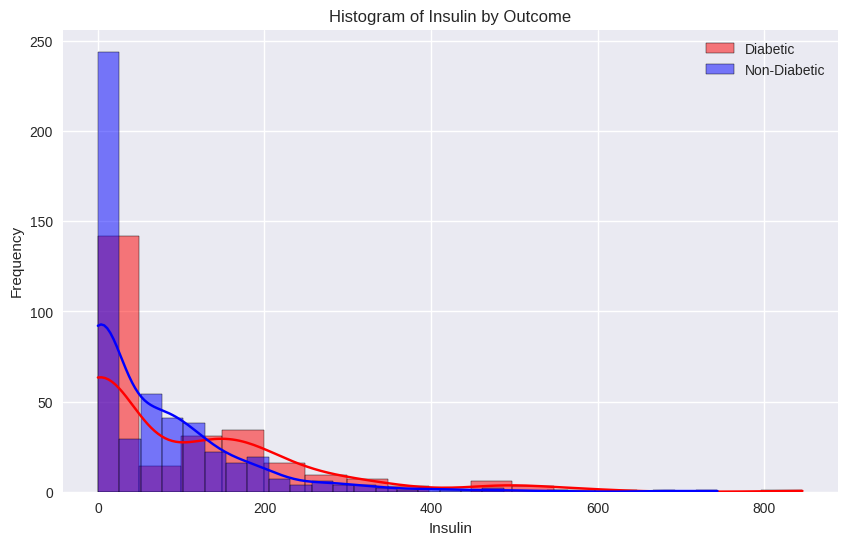

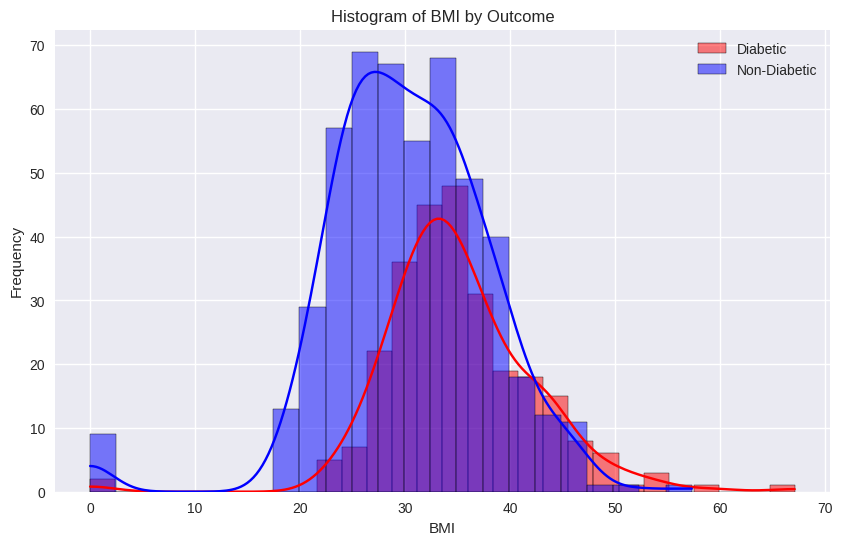

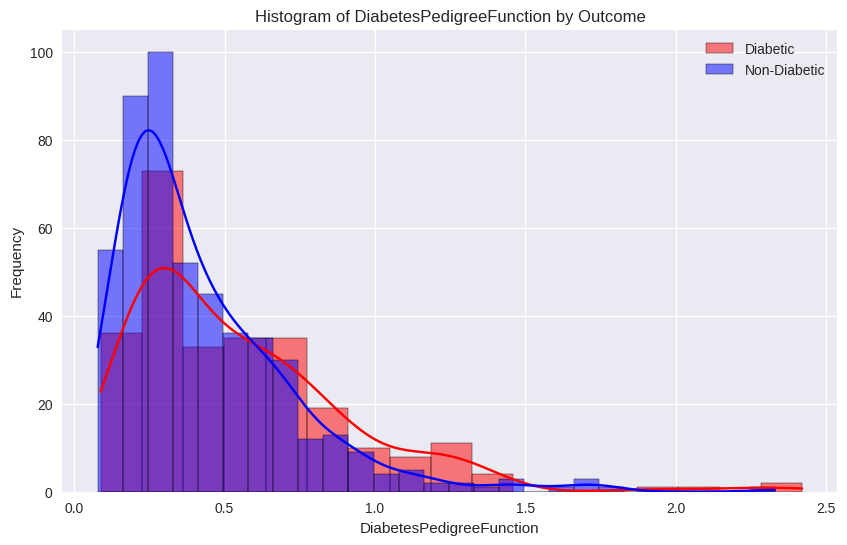

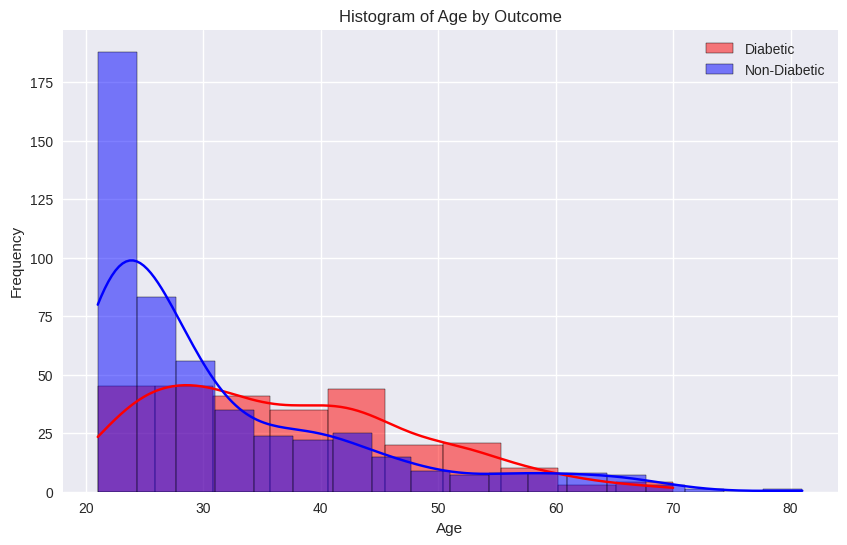

In [ ]:
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plotting histograms for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(diabetic[col], kde=True, color='red', label='Diabetic', alpha=0.5)
    sns.histplot(non_diabetic[col], kde=True, color='blue', label='Non-Diabetic', alpha=0.5)
    plt.title(f'Histogram of {col} by Outcome')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

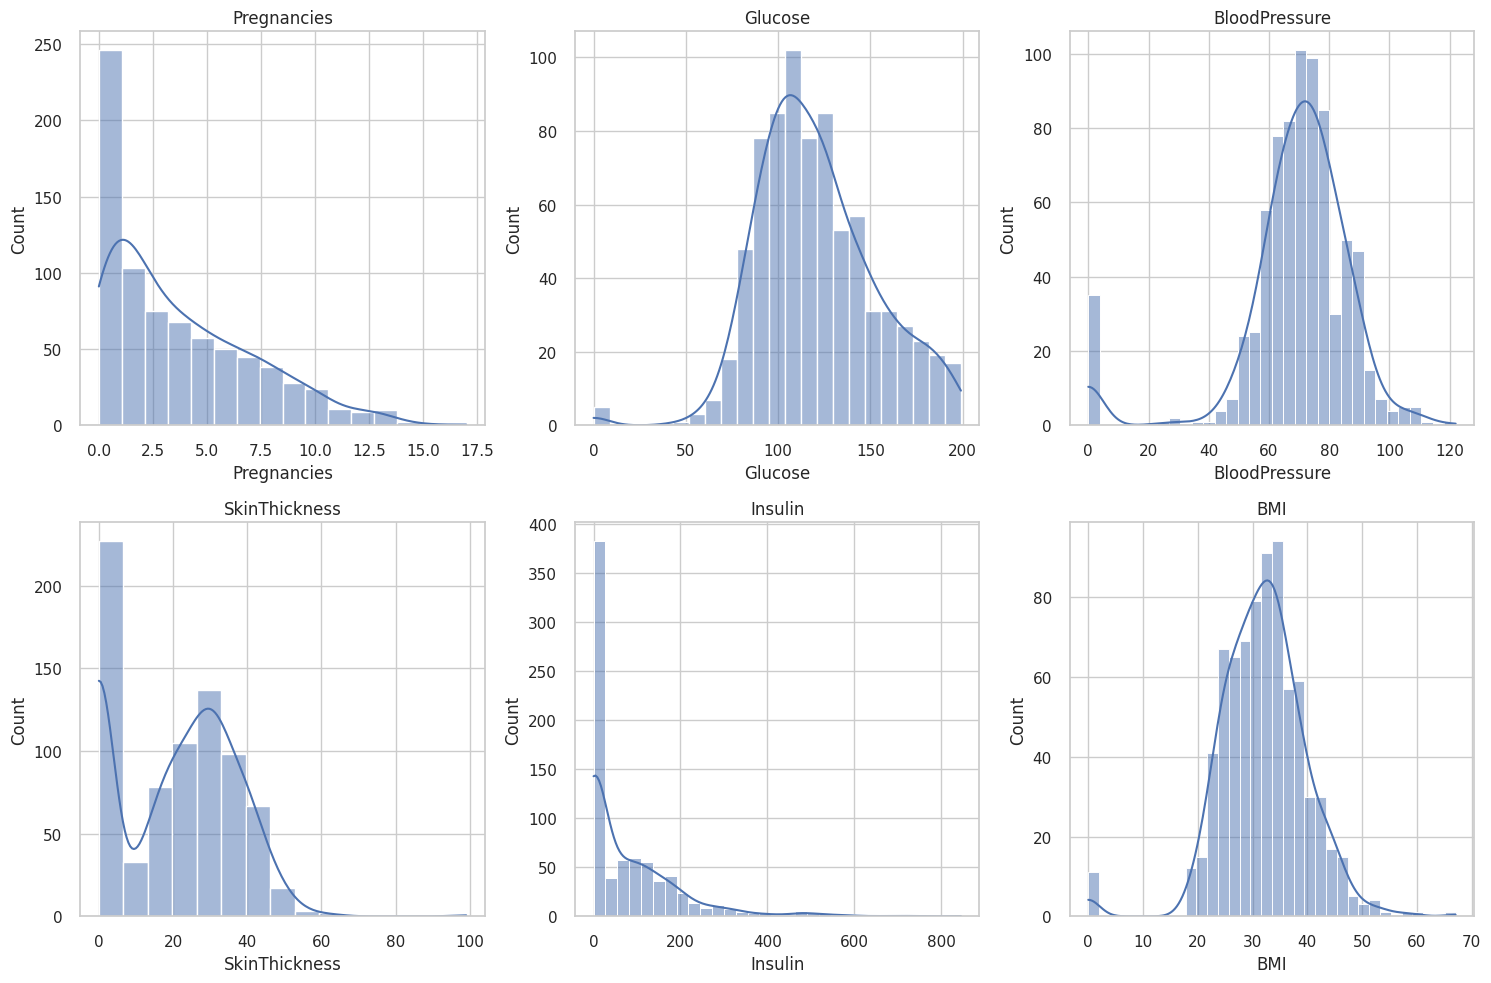

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    if i < len(numerical_columns):  # Avoid index error
        sns.histplot(data[numerical_columns[i]], kde=True, ax=ax)
        ax.set_title(numerical_columns[i])
        ax.set_ylabel('Count')
plt.tight_layout()

In [ ]:
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
standard_data=scaler.transform(x )
# transforming the data after it is being fitted

In [ ]:
standard_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
x=standard_data
y=data['Outcome']


In [ ]:
#train test spilt
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state=2)


In [ ]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier(n_estimators=1000)
model5= xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier', 'XGBoost']
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []

In [ ]:
def cal(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    accuracy = accuracy_score(pre,y_test)
    precision = precision_score(y_test, pre)
    recall = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    auc = roc_auc_score(y_test, pre)


    result1.append(accuracy)
    result2.append(precision)
    result3.append(recall)
    result4.append(f1)
    result5.append(auc)
    print(model)

    print("accuracy is : ",accuracy , ", recall is : ",recall , ", f1 is : ",f1, ", precision is :", precision,", AUC is : ",auc)


In [ ]:
cal(model1)

LogisticRegression()
accuracy is :  0.7597402597402597 , recall is :  0.717948717948718 , f1 is :  0.6021505376344085 , precision is : 0.717948717948718 , AUC is :  0.7042592592592593


In [ ]:
cal(model2)

SVC()
accuracy is :  0.7272727272727273 , recall is :  0.6666666666666666 , f1 is :  0.5333333333333333 , precision is : 0.6666666666666666 , AUC is :  0.6622222222222222


In [ ]:
cal(model3)

RandomForestClassifier()
accuracy is :  0.7597402597402597 , recall is :  0.7297297297297297 , f1 is :  0.5934065934065933 , precision is : 0.7297297297297297 , AUC is :  0.7000000000000001


In [ ]:
cal(model4)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.7207792207792207 , recall is :  0.627906976744186 , f1 is :  0.5567010309278351 , precision is : 0.627906976744186 , AUC is :  0.67


In [ ]:
cal(model5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
accuracy is :  0.7402597402597403 , recall is :  0.6521739130434783 , f1 is :  0.6 , precision is : 0.6521739130434783 , AUC is :  0.6977777777777777


In [ ]:
final_result = pd.DataFrame({
    "Algorithm":columns,
    "Accuracies":result1,
    "Precision": result2,
    "Recall":result3,
    "F1_Score":result4,
    "AUC":result5
})

In [ ]:
X_train_nn = tf.keras.utils.normalize(X_train, axis=1)
X_test_nn = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=nn_model.fit(X_train_nn, y_train, epochs=20, batch_size=32, validation_data=(X_test_nn, y_test))
loss, accuracy = nn_model.evaluate(X_test_nn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
20/20 [==============================] - 1s 14ms/step - loss: 0.6521 - accuracy: 0.6661 - val_loss: 0.6163 - val_accuracy: 0.6753
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7182 - val_loss: 0.5593 - val_accuracy: 0.6948
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.7606 - val_loss: 0.5304 - val_accuracy: 0.7338
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.7736 - val_loss: 0.5189 - val_accuracy: 0.7597
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7769 - val_loss: 0.5137 - val_accuracy: 0.7597
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.7736 - val_loss: 0.5154 - val_accuracy: 0.7662
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.7818 - val_loss: 0.5154 - val_accuracy: 0.7597
Epoch 8/20
20/20 [=

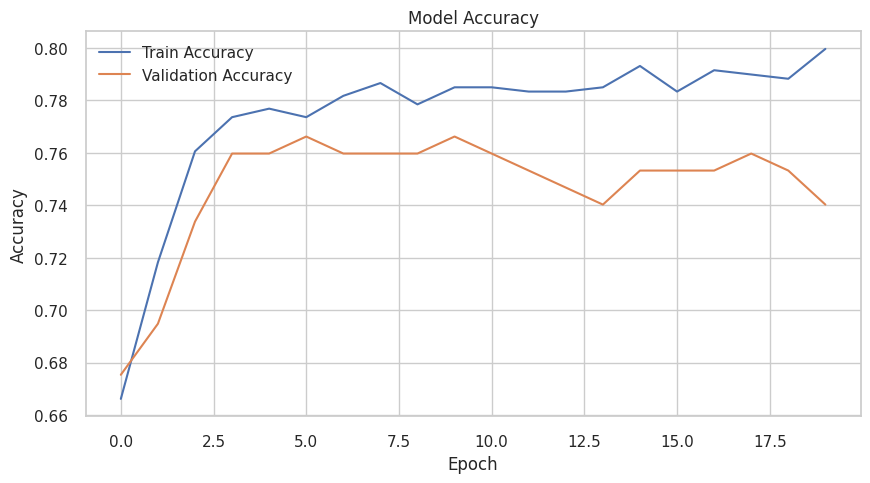

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

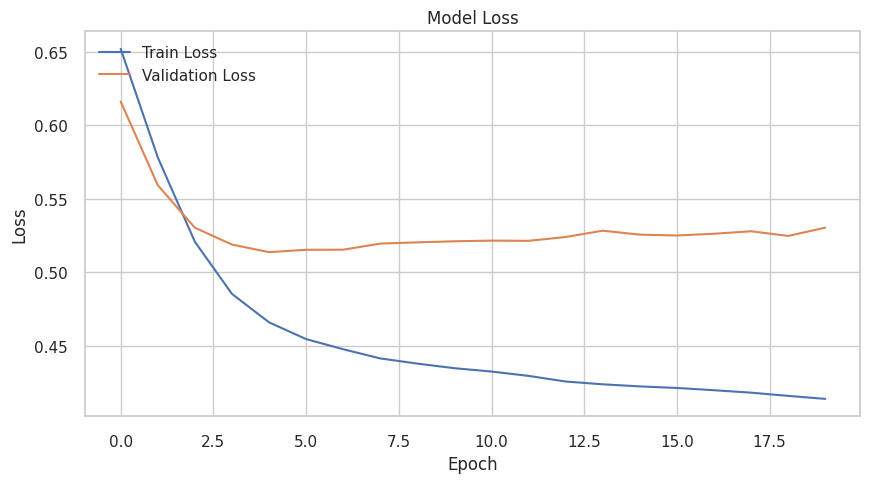

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
final_result


,Algorithm,Accuracies,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.759740,0.717949,0.717949,0.602151,0.704259
1,SVC,0.727273,0.666667,0.666667,0.533333,0.662222
2,RandomForestClassifier,0.759740,0.729730,0.729730,0.593407,0.700000
3,GradientBoostingClassifier,0.720779,0.627907,0.627907,0.556701,0.670000
4,XGBoost,0.740260,0.652174,0.652174,0.600000,0.697778


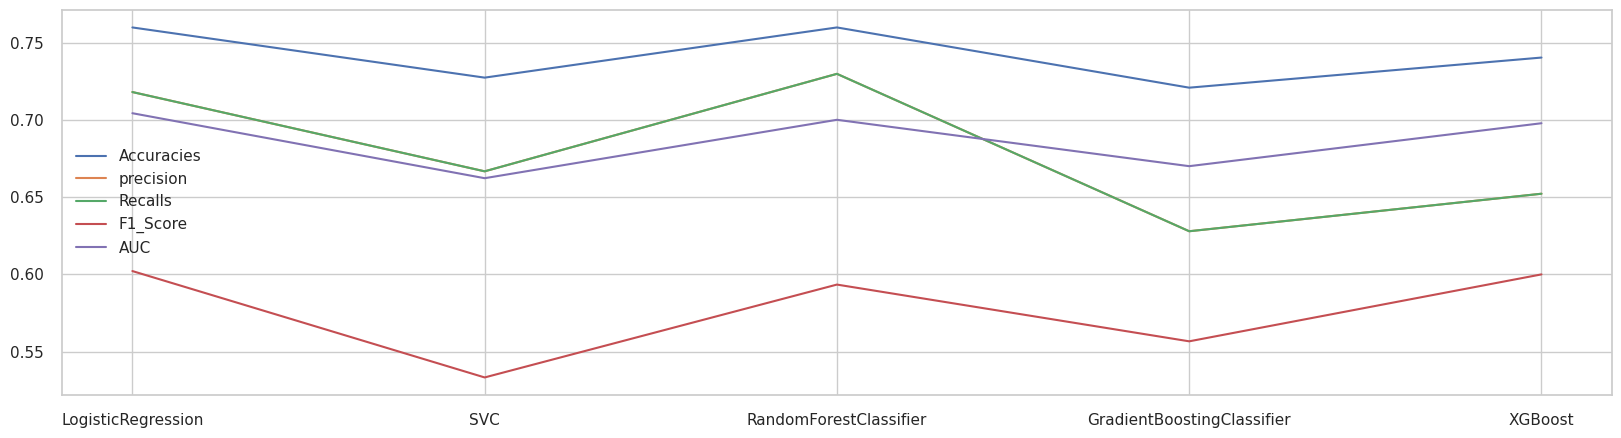

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))

plt.plot(final_result.Algorithm,result1,label='Accuracies')
plt.plot(final_result.Algorithm,result2,label='precision')

plt.plot(final_result.Algorithm,result3,label='Recalls')
plt.plot(final_result.Algorithm,result4,label='F1_Score')
plt.plot(final_result.Algorithm,result5,label='AUC')

plt.legend()
plt.show()

In [ ]:
LR_model=model1.fit(X_train,y_train)

In [ ]:
filename = 'LR_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(LR_model, file)

# Code to download the file in Colab
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model1.fit(X_train,y_train)
pre = model1.predict(X_test)


In [ ]:
pre

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
importances = model5.feature_importances_


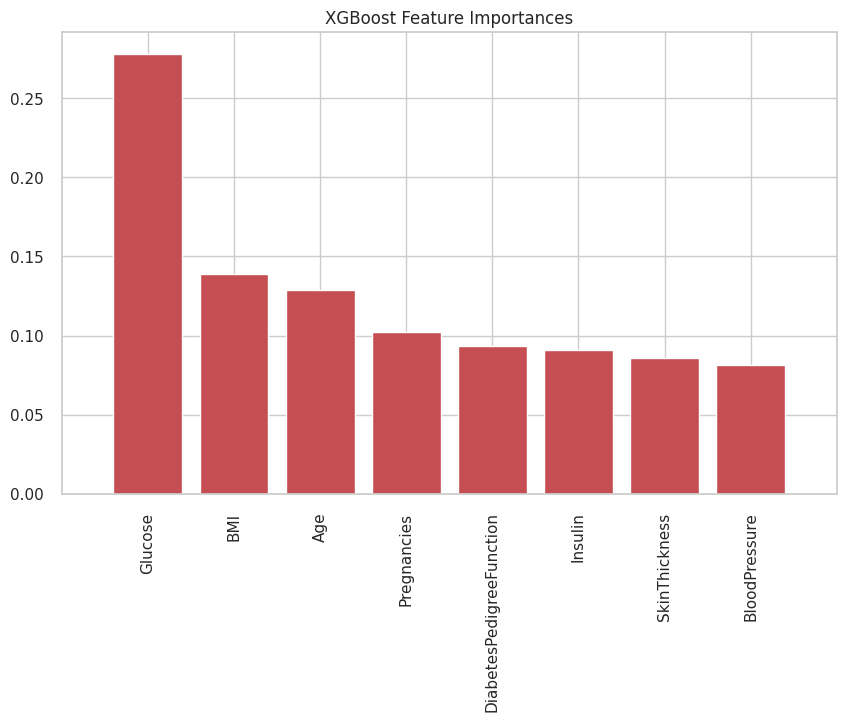

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importances
plt.figure(figsize=(10,6))
indices = np.argsort(importances)[::-1]
plt.title('XGBoost Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [data.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
